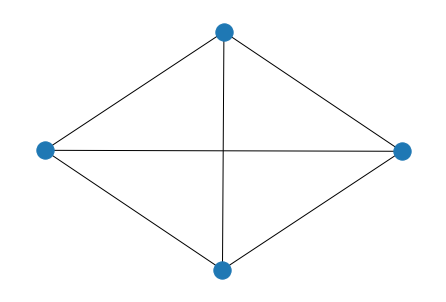

In [3]:
import networkx as nx
from linkages import *

#change the type of the edge (a,b) to val (string) 
def set_edge_type(G,edge,val):
    a,b = edge
    graph[list(G.nodes)[a]][list(G.nodes)[b]][TYPE] = val
    
graph = parallel_4_bar(True) # <- its all struts
set_edge_type(graph,(0,2),"cable")
set_edge_type(graph,(1,3),"cable")
